In [720]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [721]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [722]:
df = pd.read_csv('/content/drive/MyDrive/ML learning/AdultIncome - Sheet1.csv')

In [723]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [724]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [725]:
df = df.replace(' ?', np.nan)
df = df.replace('?', np.nan)


In [726]:
print(df.isna())

         age  workclass  fnlwgt  education  education.num  marital.status  \
0      False       True   False      False          False           False   
1      False      False   False      False          False           False   
2      False       True   False      False          False           False   
3      False      False   False      False          False           False   
4      False      False   False      False          False           False   
...      ...        ...     ...        ...            ...             ...   
32556  False      False   False      False          False           False   
32557  False      False   False      False          False           False   
32558  False      False   False      False          False           False   
32559  False      False   False      False          False           False   
32560  False      False   False      False          False           False   

       occupation  relationship   race    sex  capital.gain  capital.loss  

In [727]:
print("Missing values per column after replacing '?':")
print(df.isna().sum())

Missing values per column after replacing '?':
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [728]:
print("Duplicate rows:",df.duplicated().sum())

Duplicate rows: 24


In [729]:
print("Duplicate rows after cleaning:", df.duplicated().sum())


Duplicate rows after cleaning: 24


In [730]:
print(df.describe())

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [731]:
print(df.describe(include=[object]))



       workclass education      marital.status      occupation relationship  \
count      30725     32561               32561           30718        32561   
unique         8        16                   7              14            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race    sex native.country income  
count   32561  32561          31978  32561  
unique      5      2             41      2  
top     White   Male  United-States  <=50K  
freq    27816  21790          29170  24720  


In [732]:
print("Unique values in each column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Unique values in each column:
age : 73
workclass : 8
fnlwgt : 21648
education : 16
education.num : 16
marital.status : 7
occupation : 14
relationship : 6
race : 5
sex : 2
capital.gain : 119
capital.loss : 92
hours.per.week : 94
native.country : 41
income : 2


In [733]:
for col in df.columns:
    print("Value counts for ")
    print(df[col].value_counts())
    print("--------------------------------------------------")


Value counts for 
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
--------------------------------------------------
Value counts for 
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
--------------------------------------------------
Value counts for 
fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
136204     1
172274     1
70037      1
422013     1
216864     1
Name: count, Length: 21648, dtype: int64
--------------------------------------------------
Value counts for 
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7t

In [734]:
if 'age' in df.columns:
    print("Rows with unrealistic age (>70):")
    print(df[df['age'] > 70].shape[0])
    df = df[df['age'] <= 70]


Rows with unrealistic age (>70):
540


In [735]:
if 'hours.per.week' in df.columns:
    print("Rows with hours.per.week >70:")
    print(df[df['hours.per.week'] > 70].shape[0])
    df = df[df['hours.per.week'] <= 70]

Rows with hours.per.week >70:
490


In [736]:
print(df.shape)

(31531, 15)


In [737]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
   df[col] = df[col].astype(str).str.strip()

In [738]:
df = df.dropna(subset=['native.country'])


In [739]:
if 'workclass' in df.columns:
    df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
if 'occupation' in df.columns:
    df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [740]:
print(df.isna().sum())


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [741]:
num_cols = df.select_dtypes(include="number").columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(col ,":", outliers ,"outliers")


age : 0 outliers
fnlwgt : 956 outliers
education.num : 1092 outliers
capital.gain : 2580 outliers
capital.loss : 1466 outliers
hours.per.week : 8156 outliers


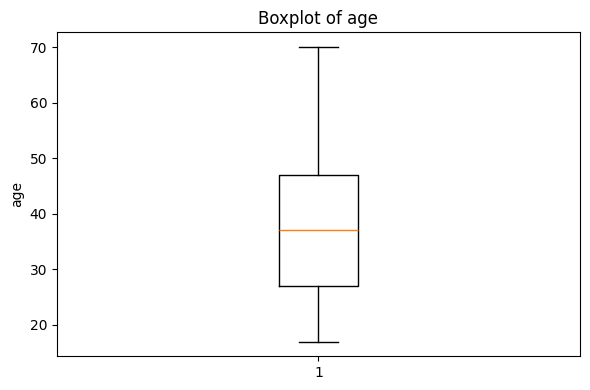

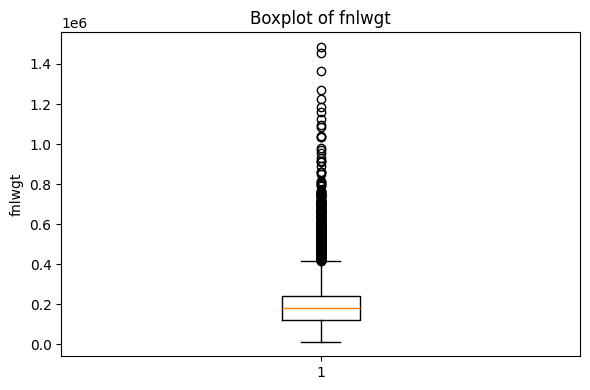

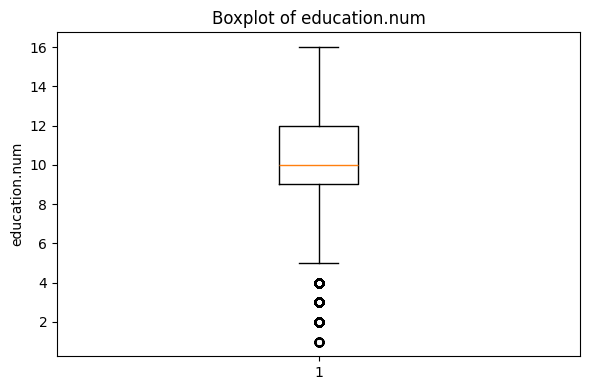

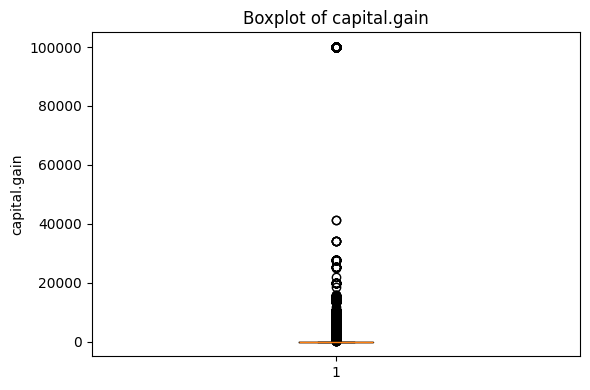

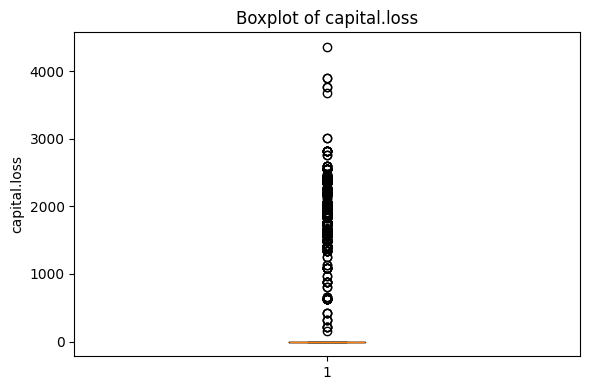

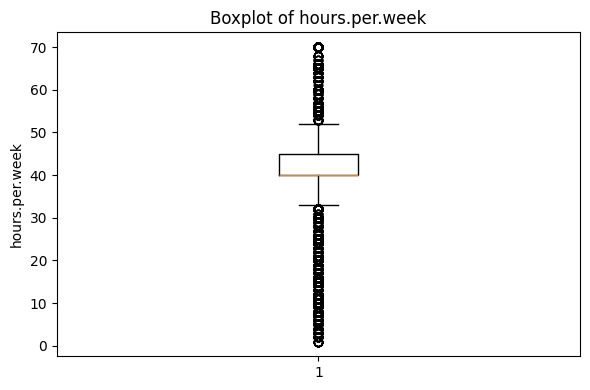

In [742]:
for col in ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col])
    plt.title('Boxplot of ' + col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [674]:
key_cols =  ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
for col in key_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = len(df)
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    removed = before - len(df)
    print(f"{col}: Removed {removed} outliers")

age: Removed 0 outliers
fnlwgt: Removed 956 outliers
education.num: Removed 1034 outliers
capital.gain: Removed 2460 outliers
capital.loss: Removed 1401 outliers
hours.per.week: Removed 6748 outliers


In [675]:
num_cols = df.select_dtypes(include="number").columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(col ,":", outliers ,"outliers")


age : 0 outliers
fnlwgt : 199 outliers
education.num : 0 outliers
capital.gain : 0 outliers
capital.loss : 0 outliers
hours.per.week : 6552 outliers


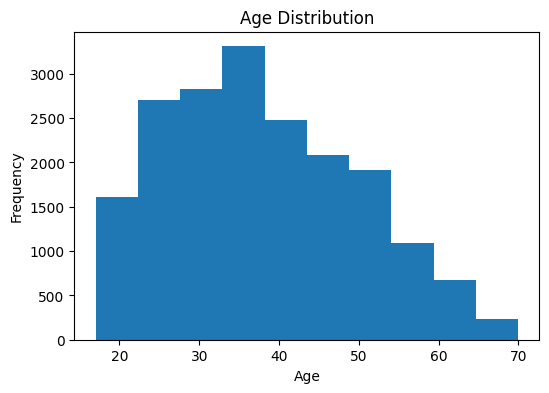

In [676]:
plt.figure(figsize=(6,4))
plt.hist(df['age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

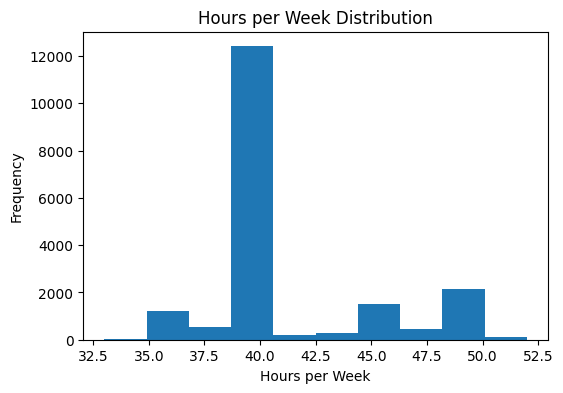

In [677]:
plt.figure(figsize=(6,4))
plt.hist(df['hours.per.week'])
plt.title("Hours per Week Distribution")
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
plt.show()

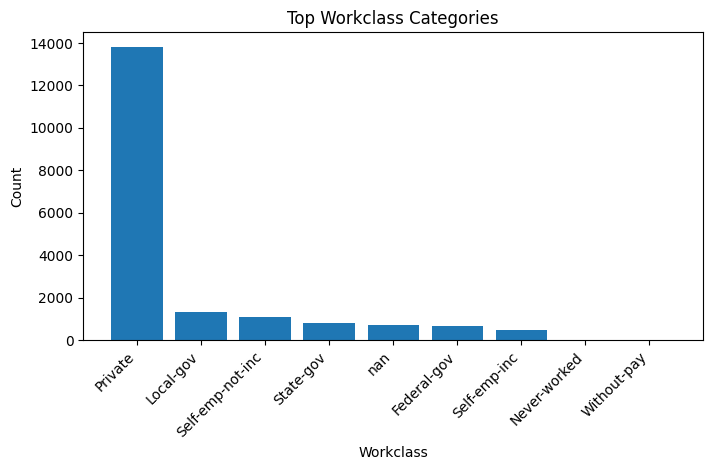

In [678]:
plt.figure(figsize=(8,4))
plt.bar(df['workclass'].value_counts().head(20).index, df['workclass'].value_counts().head(20).values)
plt.xticks(rotation=45, ha='right')
plt.title("Top Workclass Categories")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.show()


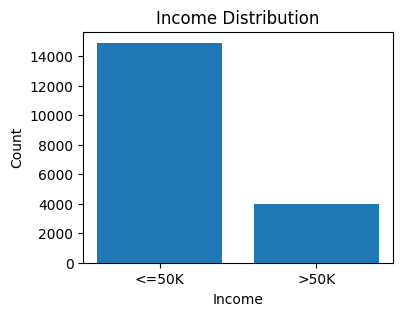

In [679]:
plt.figure(figsize=(4,3))
plt.bar(df['income'].value_counts().index, df['income'].value_counts().values)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


In [680]:
print("Correlation matrix:")
print(df.corr(numeric_only=True))

Correlation matrix:
                     age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.070117       0.054053           NaN           NaN   
fnlwgt         -0.070117  1.000000      -0.024705           NaN           NaN   
education.num   0.054053 -0.024705       1.000000           NaN           NaN   
capital.gain         NaN       NaN            NaN           NaN           NaN   
capital.loss         NaN       NaN            NaN           NaN           NaN   
hours.per.week  0.055492 -0.016989       0.131994           NaN           NaN   

                hours.per.week  
age                   0.055492  
fnlwgt               -0.016989  
education.num         0.131994  
capital.gain               NaN  
capital.loss               NaN  
hours.per.week        1.000000  


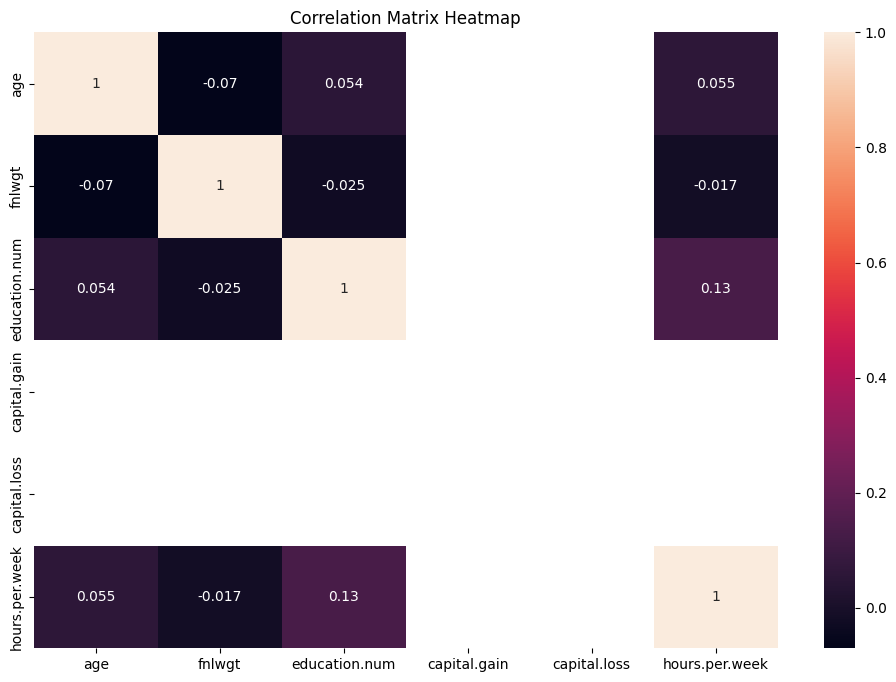

In [681]:

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [682]:
drop_cols = ['fnlwgt', 'native.country', 'education']

df = df.drop(columns=drop_cols)


In [683]:
if (df['capital.gain'] == 0).mean() > 0.95:
    df = df.drop(columns=['capital.gain'])
    print("Dropped capital.gain (mostly zeros)")

if (df['capital.loss'] == 0).mean() > 0.95:
    df = df.drop(columns=['capital.loss'])
    print("Dropped capital.loss (mostly zeros)")


Dropped capital.gain (mostly zeros)
Dropped capital.loss (mostly zeros)


####Encoding


In [684]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [685]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18932 entries, 4232 to 32559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             18932 non-null  int64 
 1   workclass       18932 non-null  object
 2   education.num   18932 non-null  int64 
 3   marital.status  18932 non-null  object
 4   occupation      18932 non-null  object
 5   relationship    18932 non-null  object
 6   race            18932 non-null  object
 7   sex             18932 non-null  object
 8   hours.per.week  18932 non-null  int64 
 9   income          18932 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.6+ MB


In [686]:

categorical_cols = df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(drop='first', dtype=int)

encoded_array = encoder.fit_transform(df[categorical_cols]).toarray()

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

df_encoded = pd.concat([df.drop(columns=categorical_cols).reset_index(drop=True),
                          encoded_df.reset_index(drop=True)], axis=1)

print("One Hot Encoding applied successfully.")
print("Shape after encoding:", df_encoded.shape)

One Hot Encoding applied successfully.
Shape after encoding: (18932, 42)


In [687]:
df = df_encoded

In [688]:
df

,age,education.num,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K
0,38,9,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,13,40,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,37,14,40,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,52,9,45,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18927,53,14,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
18928,22,10,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
18929,27,12,38,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
18930,40,9,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18932 entries, 0 to 18931
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   18932 non-null  int64
 1   education.num                         18932 non-null  int64
 2   hours.per.week                        18932 non-null  int64
 3   workclass_Local-gov                   18932 non-null  int64
 4   workclass_Never-worked                18932 non-null  int64
 5   workclass_Private                     18932 non-null  int64
 6   workclass_Self-emp-inc                18932 non-null  int64
 7   workclass_Self-emp-not-inc            18932 non-null  int64
 8   workclass_State-gov                   18932 non-null  int64
 9   workclass_Without-pay                 18932 non-null  int64
 10  workclass_nan                         18932 non-null  int64
 11  marital.status_Married-AF-spouse      189

In [690]:
corr = df.corr(numeric_only=True)
print("Correlation matrix:")
corr

Correlation matrix:


,age,education.num,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K
age,1.000000,0.054053,0.055492,0.071264,-0.012076,-0.158702,0.087855,0.093286,0.040923,0.003119,...,-0.069519,-0.371364,0.048509,0.011807,-0.010309,-0.008140,-0.039632,0.024345,0.058193,0.250008
education.num,0.054053,1.000000,0.131994,0.114443,-0.013134,-0.134452,0.065811,0.019632,0.099865,0.001208,...,-0.059929,-0.076944,-0.068808,0.027643,0.081992,-0.089161,-0.019150,0.048841,-0.007908,0.295955
hours.per.week,0.055492,0.131994,1.000000,-0.028361,-0.003843,-0.014090,0.094056,0.095016,-0.036526,0.009172,...,-0.037163,-0.124773,-0.076462,-0.044697,-0.024125,-0.099997,-0.011569,0.104053,0.178834,0.172930
workclass_Local-gov,0.071264,0.114443,-0.028361,1.000000,-0.002827,-0.451783,-0.043876,-0.067804,-0.058810,-0.002827,...,-0.018854,-0.028912,0.026697,0.031137,-0.017689,0.035803,-0.008399,-0.025270,-0.036308,0.036136
workclass_Never-worked,-0.012076,-0.013134,-0.003843,-0.002827,1.000000,-0.016887,-0.001640,-0.002534,-0.002198,-0.000106,...,-0.001768,0.010917,-0.003775,0.022760,-0.001882,0.013353,-0.000922,-0.009820,-0.003696,-0.005324
workclass_Private,-0.158702,-0.134452,-0.014090,-0.451783,-0.016887,1.000000,-0.262131,-0.405081,-0.351348,-0.016887,...,0.027097,0.027705,0.007812,-0.019179,0.004690,-0.022145,0.018479,0.017674,-0.018734,-0.070269
workclass_Self-emp-inc,0.087855,0.065811,0.094056,-0.043876,-0.001640,-0.262131,1.000000,-0.039341,-0.034122,-0.001640,...,-0.017283,-0.027635,-0.038665,0.000282,0.012949,-0.044281,-0.014307,0.039124,0.066007,0.097730
workclass_Self-emp-not-inc,0.093286,0.019632,0.095016,-0.067804,-0.002534,-0.405081,-0.039341,1.000000,-0.052730,-0.002534,...,-0.012483,-0.045428,-0.034373,-0.005613,-0.005373,-0.050380,-0.011890,0.050128,0.092702,0.011948
workclass_State-gov,0.040923,0.099865,-0.036526,-0.058810,-0.002198,-0.351348,-0.034122,-0.052730,1.000000,-0.002198,...,-0.012047,-0.026055,0.010053,-0.005891,0.003130,0.016988,-0.013369,-0.015707,-0.017064,0.018871
workclass_Without-pay,0.003119,0.001208,0.009172,-0.002827,-0.000106,-0.016887,-0.001640,-0.002534,-0.002198,1.000000,...,-0.001768,0.010917,-0.003775,-0.002213,-0.001882,0.013353,-0.000922,-0.009820,0.007227,-0.005324


In [691]:
target_corr = corr['income_>50K'].sort_values(ascending=False)
print("Correlation of each column with target (income_>50K")
print(target_corr)

Correlation of each column with target (income_>50K
income_>50K                             1.000000
marital.status_Married-civ-spouse       0.437106
education.num                           0.295955
age                                     0.250008
sex_Male                                0.202840
occupation_Exec-managerial              0.175861
hours.per.week                          0.172930
occupation_Prof-specialty               0.165090
relationship_Wife                       0.129155
workclass_Self-emp-inc                  0.097730
race_White                              0.087359
workclass_Local-gov                     0.036136
occupation_Protective-serv              0.030896
occupation_Tech-support                 0.030880
marital.status_Married-AF-spouse        0.028065
occupation_Sales                        0.023330
workclass_State-gov                     0.018871
race_Asian-Pac-Islander                 0.013223
workclass_Self-emp-not-inc              0.011948
workclass_Never-w

In [692]:
df

,age,education.num,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K
0,38,9,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,13,40,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,37,14,40,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,52,9,45,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18927,53,14,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
18928,22,10,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
18929,27,12,38,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
18930,40,9,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


####Training

In [693]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump, load

In [694]:
x = df_encoded.drop('income_>50K', axis=1)
y = df_encoded['income_>50K']

In [695]:
print("Feature matrix shape:", x.shape)
print("Target matrix shape:", y.shape)
print("Target class distribution:")
print(y.value_counts())

Feature matrix shape: (18932, 41)
Target matrix shape: (18932,)
Target class distribution:
income_>50K
0    14927
1     4005
Name: count, dtype: int64


In [696]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=42,stratify=y)

In [697]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x_train.select_dtypes(include=['object', 'bool']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)

x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

feature_names = preprocessor.get_feature_names_out()

x_train_scaled = pd.DataFrame(x_train_processed, columns=feature_names, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_processed, columns=feature_names, index=x_test.index)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [698]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

print("Training features shape:", x_train.shape)
print("Testing features shape:", x_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (13252, 41)
Testing features shape: (5680, 41)
Training target shape: (13252,)
Testing target shape: (5680,)


In [699]:
print("Scaled training features shape:", x_train_scaled.shape)
print("Scaled testing features shape:", x_test_scaled.shape)



Scaled training features shape: (13252, 41)
Scaled testing features shape: (5680, 41)


In [700]:
print("Scaled training features (first 5 rows):")
x_train_scaled.head()

Scaled training features (first 5 rows):


,num__age,num__education.num,num__hours.per.week,num__workclass_Local-gov,num__workclass_Never-worked,num__workclass_Private,num__workclass_Self-emp-inc,num__workclass_Self-emp-not-inc,num__workclass_State-gov,num__workclass_Without-pay,...,num__relationship_Not-in-family,num__relationship_Other-relative,num__relationship_Own-child,num__relationship_Unmarried,num__relationship_Wife,num__race_Asian-Pac-Islander,num__race_Black,num__race_Other,num__race_White,num__sex_Male
10808,-1.006661,1.285430,-0.374043,-0.274727,-0.008687,0.604318,-0.15881,-0.247172,-0.212004,-0.008687,...,1.638973,-0.170416,-0.397984,-0.369375,-0.213747,-0.1851,-0.339283,-0.088072,0.427665,-1.413574
6339,-1.260358,-0.577742,-0.374043,-0.274727,-0.008687,0.604318,-0.15881,-0.247172,-0.212004,-0.008687,...,-0.610138,-0.170416,-0.397984,-0.369375,-0.213747,-0.1851,-0.339283,-0.088072,0.427665,0.707427
14753,0.177262,-0.577742,-0.374043,-0.274727,-0.008687,0.604318,-0.15881,-0.247172,-0.212004,-0.008687,...,-0.610138,-0.170416,-0.397984,-0.369375,-0.213747,-0.1851,-0.339283,-0.088072,0.427665,0.707427
7516,-1.091226,-0.111949,-0.374043,-0.274727,-0.008687,0.604318,-0.15881,-0.247172,-0.212004,-0.008687,...,-0.610138,-0.170416,2.512661,-0.369375,-0.213747,-0.1851,2.947395,-0.088072,-2.338278,0.707427
12050,0.684657,-0.111949,-0.374043,-0.274727,-0.008687,-1.654758,-0.15881,-0.247172,-0.212004,-0.008687,...,-0.610138,-0.170416,-0.397984,2.707278,-0.213747,-0.1851,2.947395,-0.088072,-2.338278,-1.413574


In [701]:
print("\nScaled testing features (first 5 rows):")
x_test_scaled.head()


Scaled testing features (first 5 rows):


,num__age,num__education.num,num__hours.per.week,num__workclass_Local-gov,num__workclass_Never-worked,num__workclass_Private,num__workclass_Self-emp-inc,num__workclass_Self-emp-not-inc,num__workclass_State-gov,num__workclass_Without-pay,...,num__relationship_Not-in-family,num__relationship_Other-relative,num__relationship_Own-child,num__relationship_Unmarried,num__relationship_Wife,num__race_Asian-Pac-Islander,num__race_Black,num__race_Other,num__race_White,num__sex_Male
17327,2.037711,-1.975121,-0.374043,-0.274727,-0.008687,-1.654758,-0.15881,-0.247172,-0.212004,-0.008687,...,-0.610138,-0.170416,-0.397984,-0.369375,-0.213747,-0.1851,-0.339283,-0.088072,0.427665,0.707427
9896,-1.260358,1.285430,-0.374043,-0.274727,-0.008687,0.604318,-0.15881,-0.247172,-0.212004,-0.008687,...,-0.610138,-0.170416,2.512661,-0.369375,-0.213747,-0.1851,-0.339283,-0.088072,0.427665,-1.413574
6267,-1.429490,-0.111949,2.146841,-0.274727,-0.008687,-1.654758,-0.15881,-0.247172,4.716898,-0.008687,...,1.638973,-0.170416,-0.397984,-0.369375,-0.213747,-0.1851,-0.339283,-0.088072,0.427665,-1.413574
900,-1.260358,-0.577742,-0.374043,-0.274727,-0.008687,0.604318,-0.15881,-0.247172,-0.212004,-0.008687,...,-0.610138,-0.170416,2.512661,-0.369375,-0.213747,-0.1851,-0.339283,-0.088072,0.427665,-1.413574
5240,1.276618,-0.111949,-0.374043,-0.274727,-0.008687,0.604318,-0.15881,-0.247172,-0.212004,-0.008687,...,1.638973,-0.170416,-0.397984,-0.369375,-0.213747,-0.1851,-0.339283,-0.088072,0.427665,-1.413574


In [702]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8431338028169014


In [703]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[4175  303]
 [ 588  614]]


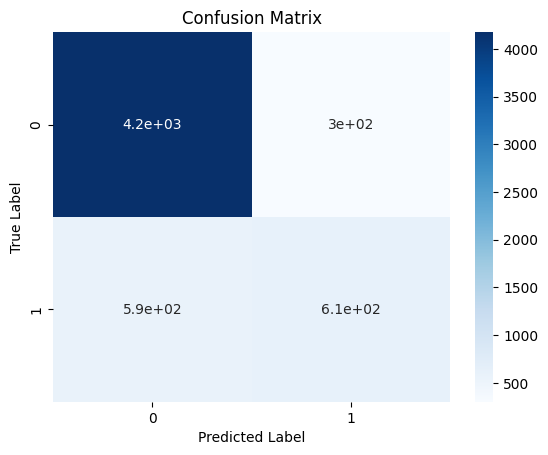

In [704]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [705]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Precision: 0.6695747001090513
Recall: 0.5108153078202995
F1-Score: 0.5795186408683342


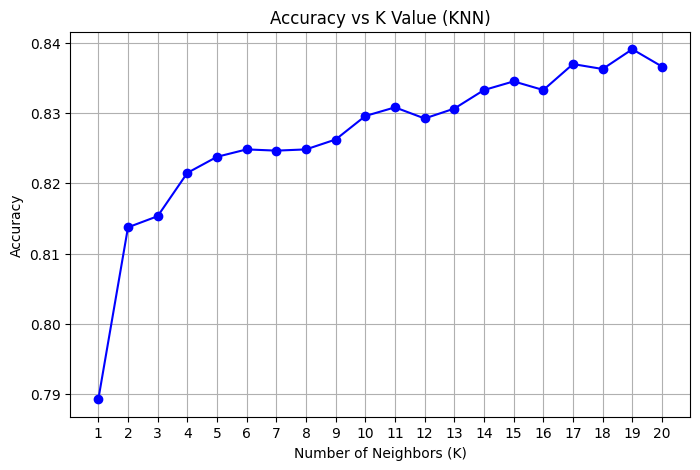

In [706]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    score = accuracy_score(y_test, y_pred)
    accuracy_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(1, 21), accuracy_scores, marker='o', color='blue')
plt.title("Accuracy vs K Value (KNN)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()




In [707]:
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print("Best K value:", best_k)
print("Highest Accuracy:", max(accuracy_scores))

Best K value: 19
Highest Accuracy: 0.8390845070422536


In [708]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train_scaled, y_train)

y_pred_knn = knn.predict(x_test_scaled)

print("KNN Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Classifier Evaluation:
Accuracy: 0.8390845070422536

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4478
           1       0.65      0.51      0.57      1202

    accuracy                           0.84      5680
   macro avg       0.76      0.72      0.74      5680
weighted avg       0.83      0.84      0.83      5680


Confusion Matrix:
 [[4148  330]
 [ 584  618]]


Decision Tree

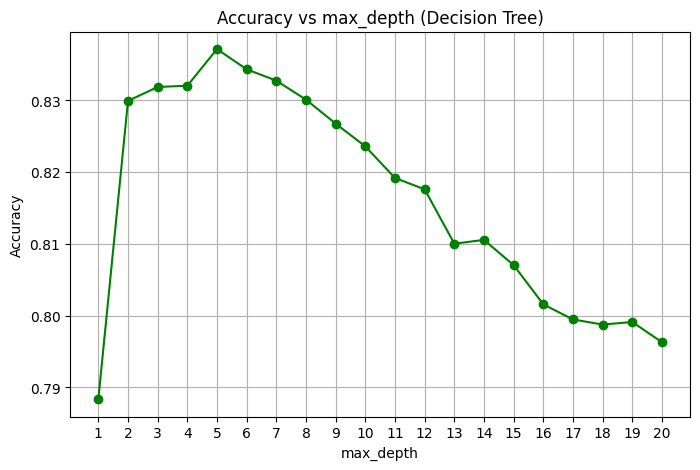

Best max_depth: 5
Highest Accuracy: 0.8371478873239436


In [709]:
from sklearn.tree import DecisionTreeClassifier

accuracy_scores = []

for depth in range(1, 21):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

plt.figure(figsize=(8,5))
plt.plot(range(1, 21), accuracy_scores, marker='o', linestyle='-', color='green')
plt.title("Accuracy vs max_depth (Decision Tree)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()

best_depth = accuracy_scores.index(max(accuracy_scores)) + 1
print("Best max_depth:", best_depth)
print("Highest Accuracy:", max(accuracy_scores))



In [710]:
final_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_tree.fit(x_train, y_train)
y_pred_tree = final_tree.predict(x_test)

print("Final Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Final Decision Tree Results:
Accuracy: 0.8371478873239436
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4478
           1       0.69      0.42      0.52      1202

    accuracy                           0.84      5680
   macro avg       0.77      0.68      0.71      5680
weighted avg       0.82      0.84      0.82      5680

Confusion Matrix:
 [[4252  226]
 [ 699  503]]


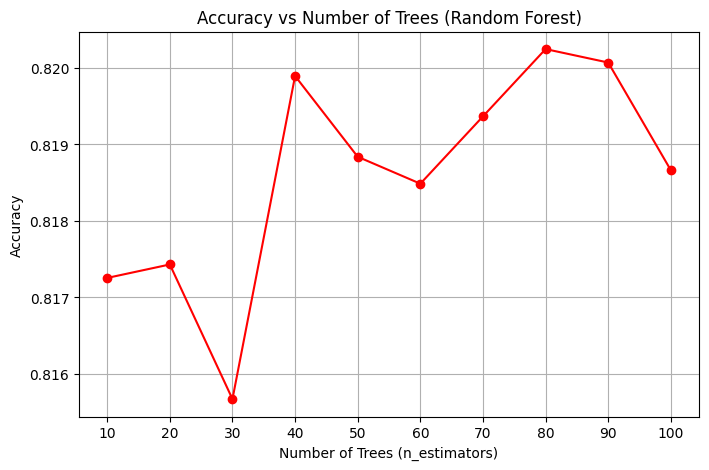

Best n_estimators: 80
Highest Accuracy: 0.8202464788732394


In [711]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

accuracy_scores = []

for n in range(10, 110, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

plt.figure(figsize=(8,5))
plt.plot(range(10, 110, 10), accuracy_scores, marker='o', linestyle='-', color='red')
plt.title("Accuracy vs Number of Trees (Random Forest)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(range(10, 110, 10))
plt.show()

best_n = range(10, 110, 10)[accuracy_scores.index(max(accuracy_scores))]
print("Best n_estimators:", best_n)
print("Highest Accuracy:", max(accuracy_scores))



In [712]:
final_rf = RandomForestClassifier(n_estimators=best_n, random_state=42)
final_rf.fit(x_train, y_train)
y_pred_rf = final_rf.predict(x_test)

print("Final Random Forest Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Final Random Forest Model Results:
Accuracy: 0.8202464788732394
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4478
           1       0.59      0.49      0.54      1202

    accuracy                           0.82      5680
   macro avg       0.73      0.70      0.71      5680
weighted avg       0.81      0.82      0.81      5680

Confusion Matrix:
 [[4067  411]
 [ 610  592]]


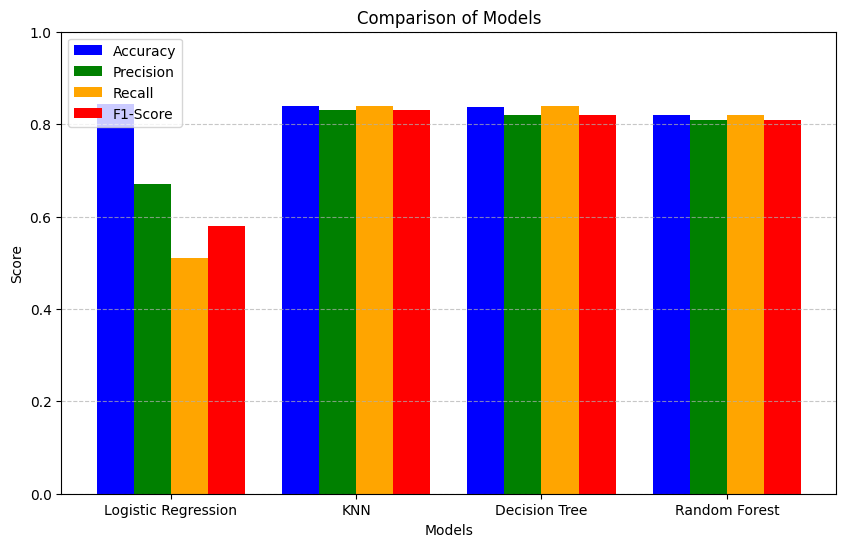

In [713]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracy = [0.8431, 0.8391, 0.8371, 0.8202]
precision = [0.6696, 0.83, 0.82, 0.81]
recall = [0.5108, 0.84, 0.84, 0.82]
f1 = [0.5795, 0.83, 0.82, 0.81]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x - width*1.5, accuracy, width, label='Accuracy', color='blue')
plt.bar(x - width/2, precision, width, label='Precision', color='green')
plt.bar(x + width/2, recall, width, label='Recall', color='orange')
plt.bar(x + width*1.5, f1, width, label='F1-Score', color='red')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Models')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [714]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracy = [0.8431, 0.8391, 0.8371, 0.8202]
precision = [0.6696, 0.83, 0.82, 0.81]
recall = [0.5108, 0.84, 0.84, 0.82]
f1 = [0.5795, 0.83, 0.82, 0.81]

metrics = {m: {'Accuracy': a, 'Precision': p, 'Recall': r, 'F1-Score': f}
           for m, a, p, r, f in zip(models, accuracy, precision, recall, f1)}

best_model = max(metrics, key=lambda x: metrics[x]['F1-Score'])

print("Model Comparison:")
for model, metric in metrics.items():
    print(f"{model}: Accuracy={metric['Accuracy']}, Precision={metric['Precision']}, Recall={metric['Recall']}, F1-Score={metric['F1-Score']}")

print(f"\nBest Model (based on balanced performance / F1-Score): {best_model}")


Model Comparison:
Logistic Regression: Accuracy=0.8431, Precision=0.6696, Recall=0.5108, F1-Score=0.5795
KNN: Accuracy=0.8391, Precision=0.83, Recall=0.84, F1-Score=0.83
Decision Tree: Accuracy=0.8371, Precision=0.82, Recall=0.84, F1-Score=0.82
Random Forest: Accuracy=0.8202, Precision=0.81, Recall=0.82, F1-Score=0.81

Best Model (based on balanced performance / F1-Score): KNN


In [715]:
import pickle
from google.colab import files


In [716]:
model_to_save = best_model

In [717]:
scaler_obj = globals().get('scaler', None)
numeric_cols_obj = globals().get('numeric_cols', None)
categorical_cols_obj = globals().get('categorical_cols', None)


In [718]:
with open('adult_best_model.pkl', 'wb') as f:
    pickle.dump(model_to_save, f)
    print("Saved: adult_best_model.pkl")

if scaler_obj is not None:
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler_obj, f)
        print("Saved: scaler.pkl")

if numeric_cols_obj is not None:
    with open('numeric_cols.pkl', 'wb') as f:
        pickle.dump(numeric_cols_obj, f)
        print(" Saved: numeric_cols.pkl")

if categorical_cols_obj is not None:
    with open('categorical_cols.pkl', 'wb') as f:
        pickle.dump(categorical_cols_obj, f)
        print("Saved: categorical_cols.pkl")

print("\nAll files saved!")

Saved: adult_best_model.pkl
Saved: categorical_cols.pkl

All files saved!


In [719]:
files.download('adult_best_model.pkl')

for fname in ['scaler.pkl', 'numeric_cols.pkl', 'categorical_cols.pkl']:
    try:
        files.download(fname)
    except:
        print(f"{fname} not found — skipping")

print("All available model files downloaded!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

scaler.pkl not found — skipping
numeric_cols.pkl not found — skipping


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All available model files downloaded!
